<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%9A%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D1%83%D0%BD%D0%B8%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=57192eaeb5b144c5f482d683e680d56997b1c254db1e889e553f3c13c52577e3
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


<ipython-input-10-7c5dfc2416aa>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


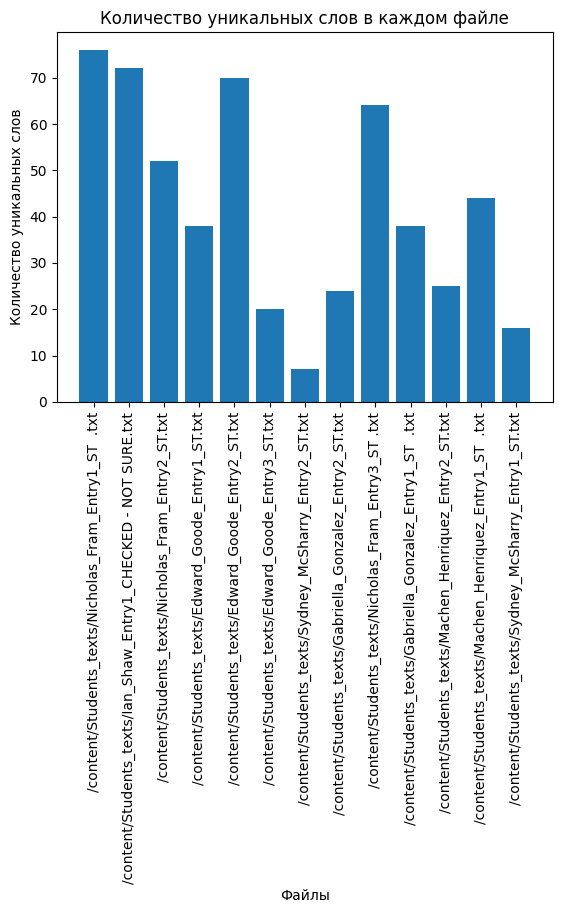

In [10]:
import os
import glob
import re
import pymorphy2
import matplotlib.pyplot as plt

# Создаем экземпляр морфологического анализатора pymorphy2
morph_analyzer = pymorphy2.MorphAnalyzer()

# Путь к папке с файлами txt
folder_path = "/content/Students_texts"

# Получаем список всех файлов txt в папке
file_list = glob.glob(os.path.join(folder_path, "*.txt"))

# Список для хранения количества уникальных слов в каждом файле
unique_word_counts = []

# Обрабатываем каждый файл
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

        # Удаление тегов типа <latincharacter="моя">моя</latincharacter>
        text = re.sub(r'<[^>]+>', '', text)

        # Удаление [unclear]
        text = text.replace('[unclear]', '')

        # Разделение текста на слова
        words = re.findall(r'\b\w+\b', text)

        # Список для хранения уникальных слов с грамматическими признаками
        unique_words = []

        # Обработка каждого слова
        for word in words:
            # Пропускаем пустые слова
            if not word.strip():
                continue

            # Получаем нормальную форму слова и его грамматические признаки
            parsed_word = morph_analyzer.parse(word.lower())[0]
            normal_form = parsed_word.normal_form
            grammatical_features = parsed_word.tag.__str__()

            # Формируем список из нормальной формы слова и его грамматических признаков
            word_info = [normal_form] + [grammatical_features]

            # Добавляем список в множество уникальных слов
            unique_words.append(word_info)

        # Вычисляем количество уникальных слов
        unique_word_count = len(set(tuple(word_info) for word_info in unique_words))
        unique_word_counts.append(unique_word_count)

# Создание диаграммы
plt.bar(range(len(file_list)), unique_word_counts, tick_label=file_list)
plt.xlabel('Файлы')
plt.ylabel('Количество уникальных слов')
plt.title('Количество уникальных слов в каждом файле')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()